### Import Data and Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

soil = pd.read_excel("data/Hawiian_Soils2.xlsx")
soil.head()

Populating the interactive namespace from numpy and matplotlib


,Soil_Sample,NTM culture,Microbiome,Latitude,Longitude,Address:,Town:,Zip,pH,Calcite,...,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,Kaol. + Halloysite,% Kaolinite,% Halloysite
0,BGLD12_2,neg.,no,19.715265,-155.084910,Ululani St.,Hilo,96720.0,4.97,0.000000,...,3.868190,0.031278,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN
1,BGLD12_4,neg.,no,19.675419,-155.090209,474 Awela St.,Hilo,96720.0,5.98,4.615385,...,6.461538,8.000000,17.846154,0.0,0.0,1.538462,2.307692,3.846154,3.846154,0.0
2,HNL-12_1,neg.,no,21.306053,-157.835709,1333 Heulu St.,Honolulu,96822.0,5.79,1.303781,...,5.867014,6.649283,0.000000,0.0,0.0,4.172099,0.000000,4.172099,4.172099,0.0
3,HNL-12_16,neg.,no,21.422187,-157.954707,2276 Aumakua St.,Pearl City,96782.0,7.65,0.000000,...,1.794555,17.369751,2.594887,0.0,0.0,2.772241,57.936271,60.708512,60.708512,0.0
4,HNL-12_17,neg.,no,21.318042,-157.808551,2562 Olopua St.,Honolulu,96822.0,6.79,0.000000,...,4.666648,1.460627,8.442178,0.0,0.0,34.269674,8.324827,42.594501,42.594501,0.0


In [22]:
soil_numeric = soil.drop(soil.columns[3:8], axis=1)
soil_numeric.head()

,Soil_Sample,NTM culture,Microbiome,pH,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,...,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,Kaol. + Halloysite,% Kaolinite,% Halloysite
0,BGLD12_2,neg.,no,4.97,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3.868190,0.031278,0.000000,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN
1,BGLD12_4,neg.,no,5.98,4.615385,0.000000,1.384615,0.0,0.0,0.0,...,6.461538,8.000000,17.846154,0.0,0.0,1.538462,2.307692,3.846154,3.846154,0.0
2,HNL-12_1,neg.,no,5.79,1.303781,11.734029,0.000000,0.0,0.0,0.0,...,5.867014,6.649283,0.000000,0.0,0.0,4.172099,0.000000,4.172099,4.172099,0.0
3,HNL-12_16,neg.,no,7.65,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.794555,17.369751,2.594887,0.0,0.0,2.772241,57.936271,60.708512,60.708512,0.0
4,HNL-12_17,neg.,no,6.79,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,4.666648,1.460627,8.442178,0.0,0.0,34.269674,8.324827,42.594501,42.594501,0.0


In [23]:
### Scale Data
# Attributes of interest
cols = ['pH',
 'Kaol. + Halloysite',
 'Calcite',
 'Mg Calcite',
 'Aragonite',
 'Gypsum',
 'Bassanite',
 'Hexahydrite',
 'Forsterite',
 'Augite',
 'Enstatite',
 'Hedenbergite',
 'Anorthoclase',
 'Oligoclase',
 'Andesine',
 'Bytownite',
 'Labradorite',
 'Anorthite',
 'Ferrihydrite',
 'Hematite',
 'Maghemite',
 'Ilmenite',
 'Rutile',
 'Goethite',
 'Magnetite',
 'Quartz',
 'Gibbsite',
 'Montmorillonite',
 'Palygorksite',
 'Halloysite',
 'Kaolinite']

subset_df = soil_numeric[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
soil_numeric2 = pd.concat([scaled_df, soil_numeric['NTM culture']], axis=1)
soil_numeric2.head()

,pH,Kaol. + Halloysite,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,Forsterite,Augite,...,Rutile,Goethite,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,NTM culture
0,-2.086045,-2.089782,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,0.952873,6.010956,...,-0.268507,-1.185385,0.028058,-1.190451,-0.969728,-0.259275,-0.222398,-1.604499,-1.287900,neg.
1,-1.010594,-1.884781,0.725117,-0.322724,-0.089487,-0.136083,-0.136083,-0.136083,2.361536,1.647510,...,-0.268507,-0.629383,0.813304,0.497958,2.647287,-0.259275,-0.222398,-1.498754,-1.100556,neg.
2,-1.212907,-1.867408,-0.125603,2.514003,-0.424655,-0.136083,-0.136083,-0.136083,3.770672,0.891607,...,-0.268507,-0.814450,0.633287,0.211769,-0.969728,-0.259275,-0.222398,-1.317732,-1.287900,neg.
3,0.767626,1.145994,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,-0.460417,-0.267754,...,-0.268507,-0.445412,-0.599824,2.483217,-0.443803,-0.259275,-0.222398,-1.413951,3.415509,neg.
4,-0.148104,0.180514,-0.460532,-0.322724,-0.424655,-0.136083,-0.136083,-0.136083,-0.460417,-0.267754,...,-0.268507,1.260229,0.269825,-0.887601,0.741312,-0.259275,-0.222398,0.751002,-0.612070,neg.


### Heatmap

Text(0.5,0.98,u'Soil Attributes Correlation Heatmap')

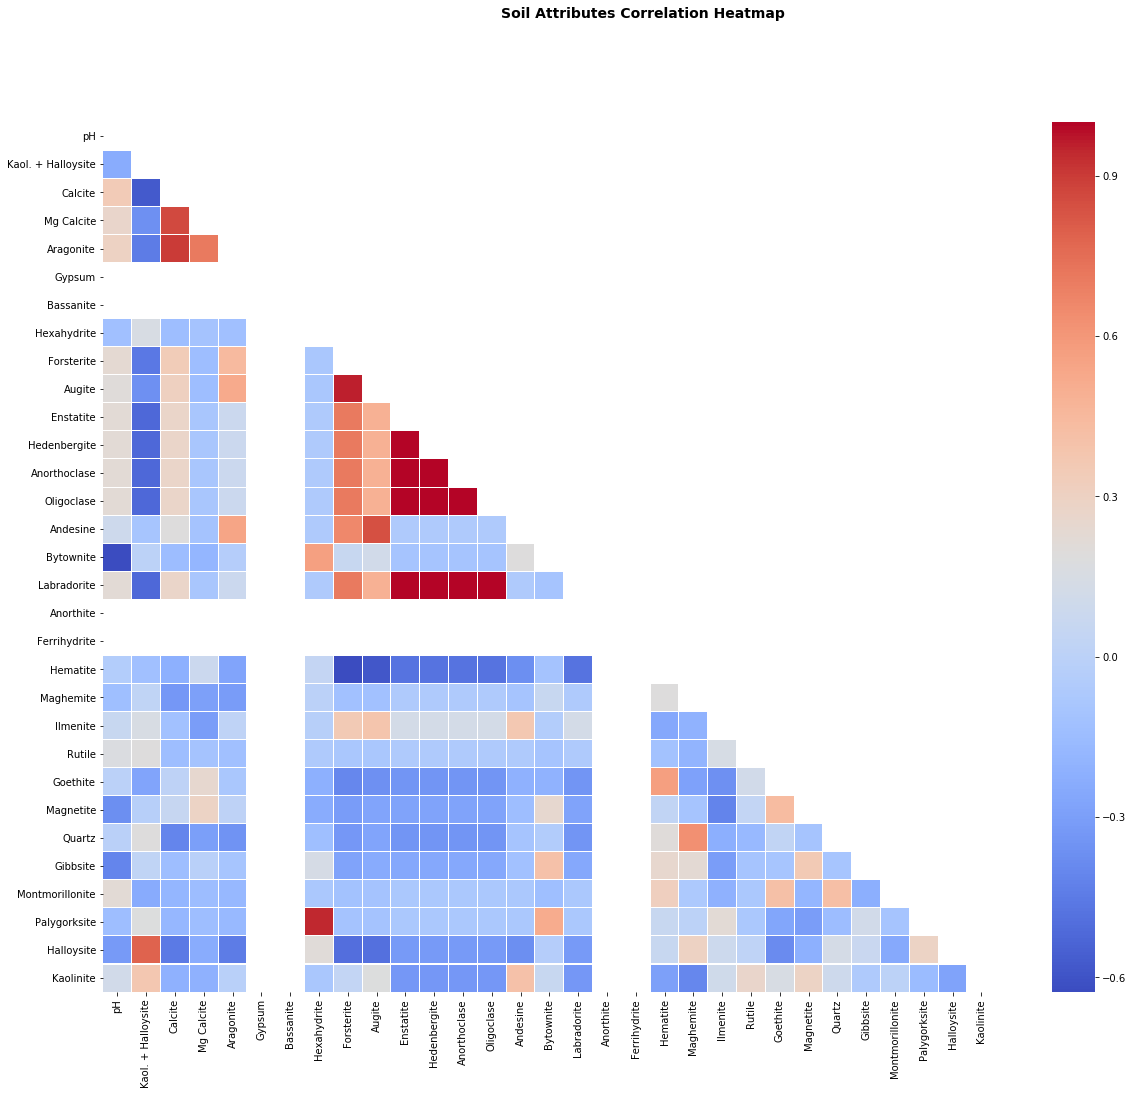

In [12]:
import seaborn as sns
import numpy as np
corr_matrix = soil_numeric2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))
hm = sns.heatmap(corr_matrix,
                 mask=mask,
                 ax=ax, # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 square=False,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)
fig.suptitle('Soil Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

### Individual Comparisons

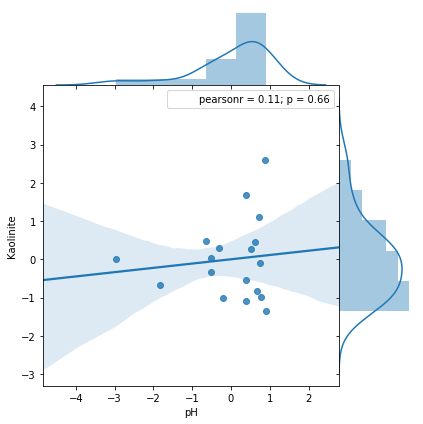

In [13]:
jp = sns.jointplot(data=soil_numeric2,
                   x='pH', 
                   y='Kaolinite', 
                   kind='reg', 
                   space=0, size=6, ratio=4)

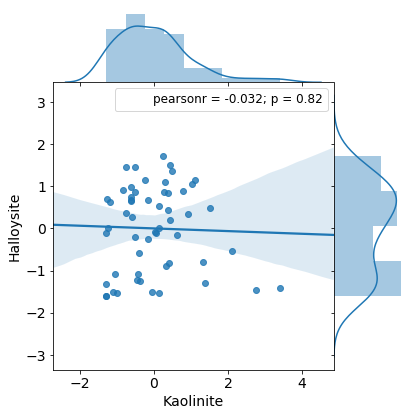

In [88]:
matplotlib.rcParams.update({'font.size': 14})
jp = sns.jointplot(data=soil_numeric2,
                   x='Kaolinite', 
                   y='Halloysite', 
                   kind='reg', 
                   space=0, size=6, ratio=4)

### Parallel Coordinates

In [18]:
final_df = soil_numeric.drop(soil_numeric.columns[-3:-1], axis=1)
final_df.pop("% Halloysite")
final_df.columns

Index([u'Soil_Sample', u'NTM culture', u'pH', u'Calcite', u'Mg Calcite',
       u'Aragonite', u'Gypsum', u'Bassanite', u'Hexahydrite', u'Forsterite',
       u'Augite', u'Enstatite', u'Hedenbergite', u'Anorthoclase',
       u'Oligoclase', u'Andesine', u'Bytownite', u'Labradorite', u'Anorthite',
       u'Ferrihydrite', u'Hematite', u'Maghemite', u'Ilmenite', u'Rutile',
       u'Goethite', u'Magnetite', u'Quartz', u'Gibbsite', u'Montmorillonite',
       u'Palygorksite', u'Halloysite', u'Kaolinite'],
      dtype='object')

#### Full Data Set

In [19]:
### Scale Data
# Attributes of interest
cols = ['pH',
 'Kaol. + Halloysite',
 'Calcite',
 'Mg Calcite',
 'Aragonite',
 'Gypsum',
 'Bassanite',
 'Hexahydrite',
 'Forsterite',
 'Augite',
 'Enstatite',
 'Hedenbergite',
 'Anorthoclase',
 'Oligoclase',
 'Andesine',
 'Bytownite',
 'Labradorite',
 'Anorthite',
 'Ferrihydrite',
 'Hematite',
 'Maghemite',
 'Ilmenite',
 'Rutile',
 'Goethite',
 'Magnetite',
 'Quartz',
 'Gibbsite',
 'Montmorillonite',
 'Palygorksite',
 'Halloysite',
 'Kaolinite']

subset_df = soil_numeric[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, final_df['NTM culture']], axis=1)
final_df.head()

,pH,Kaol. + Halloysite,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,Forsterite,Augite,...,Rutile,Goethite,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,NTM culture
0,0.389490,-0.388769,0.778996,-0.444346,2.240990,0.0,0.0,-0.242536,2.721266,3.481163,...,-0.242536,-0.860926,-0.591053,-0.422280,-0.504046,-0.327570,-0.311716,-1.515898,1.682833,NaN
1,0.514311,1.555829,-0.572328,-0.444346,-0.533819,0.0,0.0,-0.242536,-0.353335,-0.342623,...,-0.242536,-1.227685,-1.262651,1.523026,-0.218904,1.491729,-0.311716,1.422969,0.281079,NaN
2,-0.525869,0.619011,-0.572328,-0.444346,-0.533819,0.0,0.0,4.123106,-0.353335,-0.342623,...,-0.242536,-0.895797,-0.966589,-0.552061,0.571941,-0.327570,3.909352,0.860807,-0.333346,NaN
3,0.670338,0.144567,-0.572328,-0.444346,-0.533819,0.0,0.0,-0.242536,-0.353335,-0.342623,...,-0.242536,-0.986494,-0.099562,2.523075,-0.388713,-0.327570,-0.311716,0.700520,-0.832489,NaN
4,-2.970293,-0.323148,-0.572328,-0.444346,-0.533819,0.0,0.0,-0.242536,-0.353335,-0.342623,...,-0.242536,-0.054737,2.252036,0.348633,1.824596,-0.327570,-0.311716,-0.333696,-0.000751,NaN


In [137]:
grouped = final_df.groupby('NTM culture')
nmax = 11
import random
random.seed(1)
balanced = grouped.apply(lambda x: x.sample(nmax) if len(x) > nmax else x)

In [90]:
culture_average = balanced.groupby('NTM culture').mean()
culture_average['NTM culture'] = culture_average.index
culture_average['NTM culture'].replace(('pos.', 'neg.'), ('Positive Culture', 'Negative Culture'), inplace=True)
culture_average.head()

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'NTM culture' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,pH,Kaol. + Halloysite,Calcite,Mg Calcite,Aragonite,Gypsum,Bassanite,Hexahydrite,Forsterite,Augite,...,Rutile,Goethite,Magnetite,Quartz,Gibbsite,Montmorillonite,Palygorksite,Halloysite,Kaolinite,NTM culture
NTM culture,,,,,,,,,,,,,,,,,,,,,
neg.,-0.138424,0.194963,-0.050323,-0.120177,-0.396441,-0.136083,-0.136083,-0.136083,-0.087182,-0.251349,...,0.221052,0.308577,0.089830,-0.177705,0.300465,-0.087908,-0.222398,0.226988,0.028856,Negative Culture
pos.,-0.038720,-0.165673,0.320186,0.221600,0.276920,0.544331,0.544331,0.544331,0.401146,-0.158580,...,-0.268507,-0.563917,-0.403642,0.401262,-0.142081,0.006533,0.475859,0.006276,-0.259753,Positive Culture


(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 <a list of 9 Text yticklabel objects>)

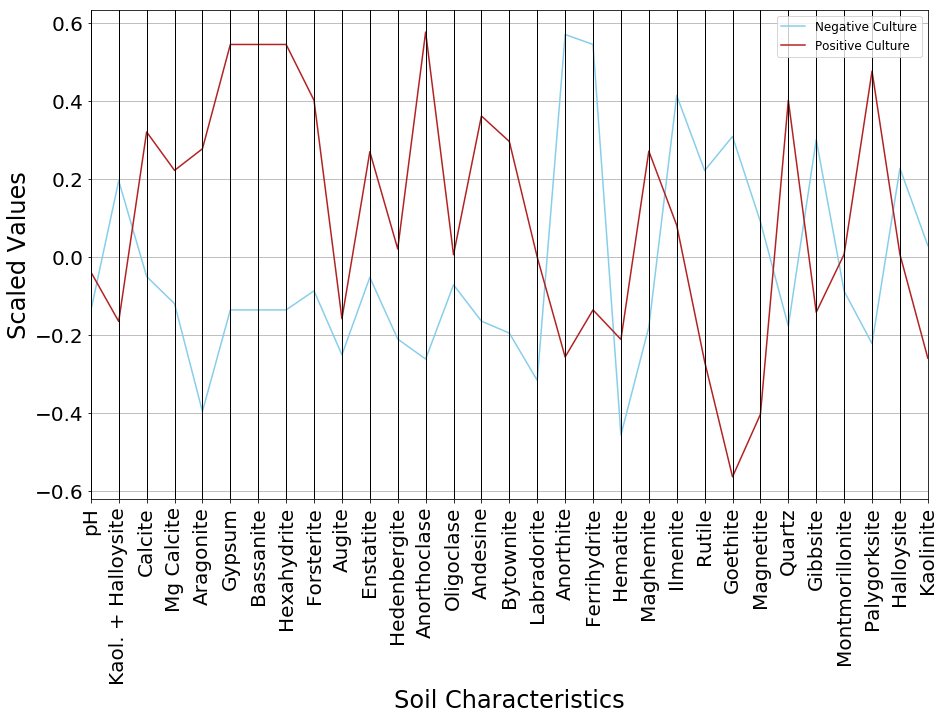

In [91]:
plt.rc('legend',**{'fontsize':12})
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(culture_average, 
                          'NTM culture', 
                          color=('skyblue', 'firebrick'))
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

#### Partial Feature Set

In [75]:
cols = ['Gibbsite',
 'Halloysite',
 'Kaolinite',
       'NTM culture']

culture_average2 = culture_average[cols]

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 <a list of 8 Text yticklabel objects>)

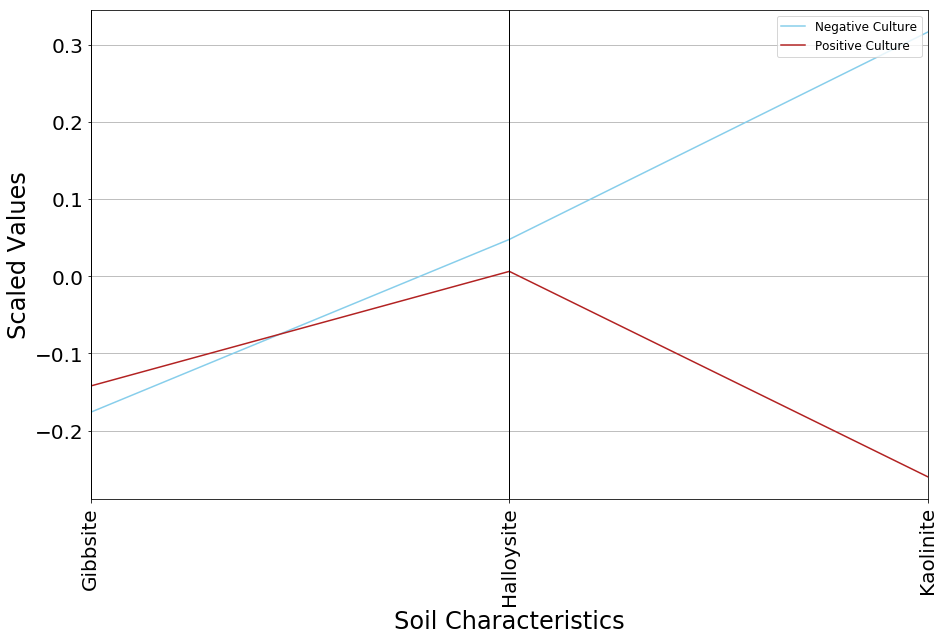

In [76]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(culture_average2, 
                          'NTM culture', 
                          color=('skyblue', 'firebrick'))
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

### Feature Importance

#### XGBoost

In [138]:
balanced['NTM culture'].replace(('pos.', 'neg.'), (1, 0), inplace=True)
from xgboost import XGBClassifier
y = balanced.pop('NTM culture')

# fit model no training data
model = XGBClassifier(seed=1)
model.fit(balanced, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text yticklabel objects>)

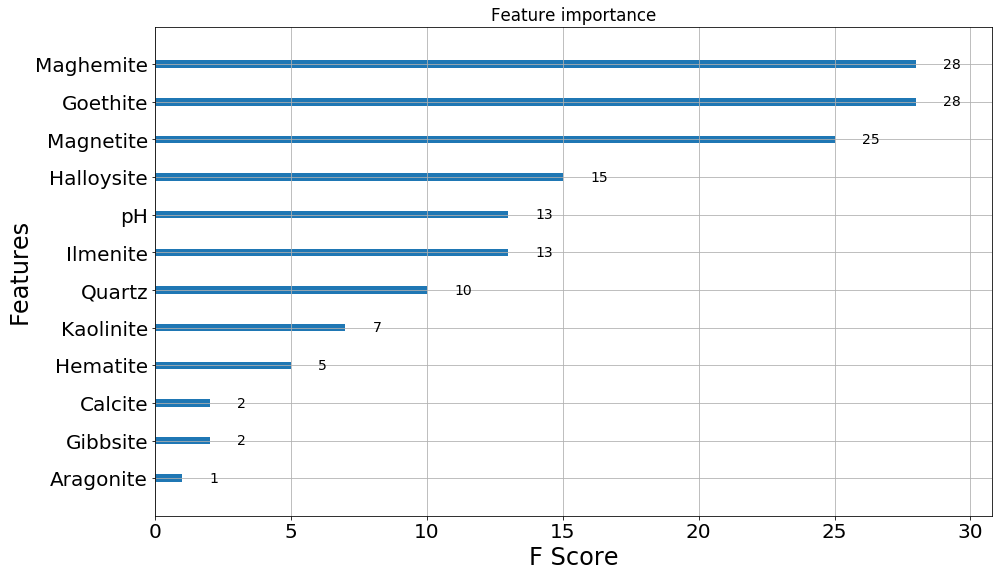

In [140]:
from xgboost import plot_importance
plot_importance(model)
plt.xlabel('F Score', size = 24)
plt.ylabel('Features', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

In [141]:
importances = model.feature_importances_
df_import = pd.DataFrame(importances)
df_import.columns = ["Importance"]
df_import["Names"] = balanced.columns.astype(str)
df_import.sort_values("Importance", ascending=False).head(10)

,Importance,Names
20,0.187919,Maghemite
23,0.187919,Goethite
24,0.167785,Magnetite
29,0.100671,Halloysite
0,0.087248,pH
21,0.087248,Ilmenite
25,0.067114,Quartz
30,0.046980,Kaolinite
19,0.033557,Hematite
2,0.013423,Calcite


#### Random Forest

In [219]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=1000,random_state=0)
forest.fit(final_df, y)
importances = forest.feature_importances_
df_import = pd.DataFrame(importances)
df_import.columns = ["Importance"]
df_import["Names"] = final_df.columns.astype(str)
df_import.sort_values("Importance", ascending=False).head(10)

#### RFE

In [218]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 2)
rfe = rfe.fit(final_df, y)
# summarize the selection of the attributes

score = df_import.reindex(list(rfe.ranking_))
score.sort_values("Importance", ascending=False).head(10)

### Conclusions